In [12]:
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.utils import shuffle 

In [13]:
dataframe = glob("C:/Users/Kunal Bambardekar/Downloads/Activity Recognition from Single Chest-Mounted Accelerometer/*.csv")

In [14]:
#Dataset is loaded and merged, a new column named User_ID which gives the ID of the User after data is merged.

def load_data(dataframe):
    dataset = pd.DataFrame()
    for index,filename in enumerate(dataframe):
        df = pd.read_csv(filename, header=None)
        df['User_ID'] = index + 1
        dataset = dataset.append(df.iloc[:,1:])
    return dataset

df = load_data(dataframe)

#Names are given for the columns
df.columns = ['x_acceleration','y_acceleration','z_acceleration','Label','User_ID']

df.head()

,x_acceleration,y_acceleration,z_acceleration,Label,User_ID
0,1502,2215,2153,1,1
1,1667,2072,2047,1,1
2,1611,1957,1906,1,1
3,1601,1939,1831,1,1
4,1643,1965,1879,1,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1926896 entries, 0 to 166740
Data columns (total 5 columns):
 #   Column          Dtype
---  ------          -----
 0   x_acceleration  int64
 1   y_acceleration  int64
 2   z_acceleration  int64
 3   Label           int64
 4   User_ID         int64
dtypes: int64(5)
memory usage: 88.2 MB


In [16]:
df['User_ID'].value_counts()

15    166741
13    163001
1     162501
11    160001
12    140901
14    138001
8     138001
2     126801
10    122201
6     116101
4     114702
3     104451
7     103501
9     102341
5      67651
Name: User_ID, dtype: int64

In [17]:
print(df.shape, df.dtypes)

(1926896, 5) x_acceleration    int64
y_acceleration    int64
z_acceleration    int64
Label             int64
User_ID           int64
dtype: object


In [18]:
#Checking missing values
df.isnull().sum()

x_acceleration    0
y_acceleration    0
z_acceleration    0
Label             0
User_ID           0
dtype: int64

In [19]:
#Replacing the 0 label to NaN and dropping the column
#This is done as it was completely dropping 10,000 rows if not followed the process of assigning Nan
df['Label']=df['Label'].replace(0, np.nan)
df.dropna(subset = ["Label"], inplace=True)
df['Label'] = df['Label'].astype(int)

In [20]:
print(df['Label'].value_counts())
print(df['Label'].unique())

1    608667
7    593563
4    357064
3    216737
5     51498
2     47878
6     47770
Name: Label, dtype: int64
[1 2 3 4 5 6 7]


## 2. Let's explore the data


In [25]:
# HEATMAP GENERATION
print("A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space. In our problem statement we can cluster the columns and see the correlation.")

A heat map (or heatmap) is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The variation in color may be by hue or intensity, giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space. In our problem statement we can cluster the columns and see the correlation.


x-accelaration


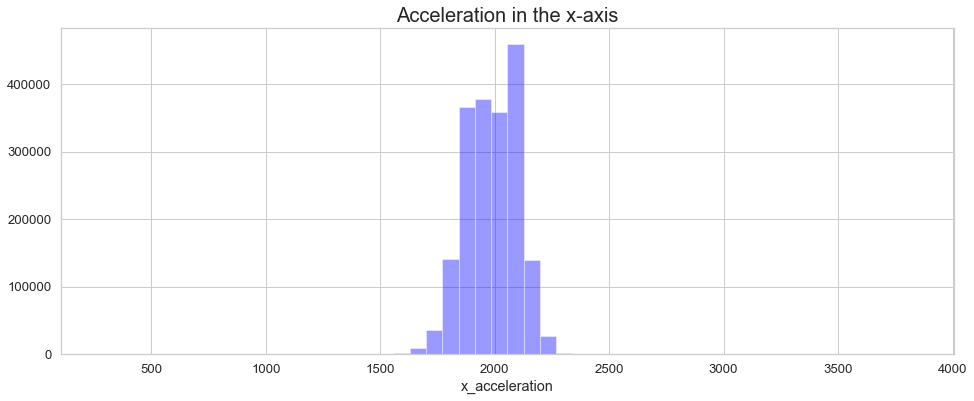

In [27]:
print("x-accelaration")


plt.figure(figsize=[16,6])
sns.set_style('whitegrid') 
sns.distplot(df['x_acceleration'],kde=False, color ='blue') 
plt.title('Acceleration in the x-axis',fontsize=20)
plt.show()

Conclusion: Most of the x_accelearation lies in between 1500 and 2500 while the maximum value of x_acceleration is above 400000

y-accelaration


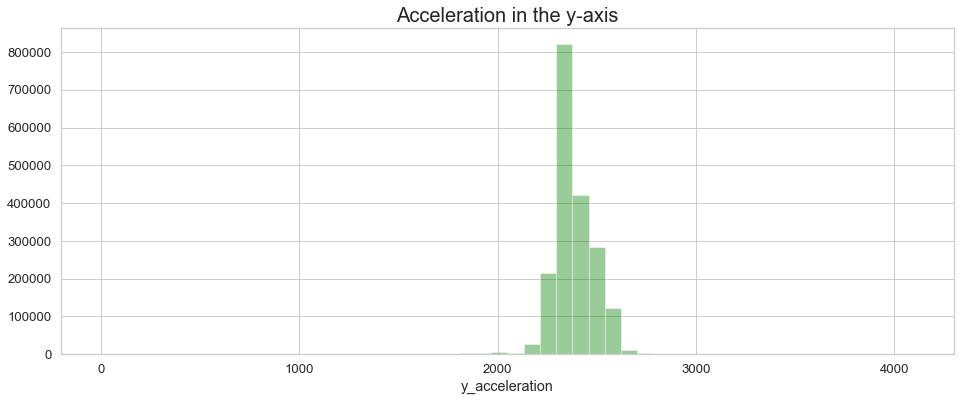

In [28]:
print("y-accelaration")


plt.figure(figsize=[16,6])
sns.set_style('whitegrid') 
sns.distplot(df['y_acceleration'],kde=False, color ='green') 
plt.title('Acceleration in the y-axis',fontsize=20)
plt.show()

Conclusion: Most of the y_accelaration lies in between 2000 and 2700 while the maximum value of y_acceleration just crosses 800000

z-accelaration


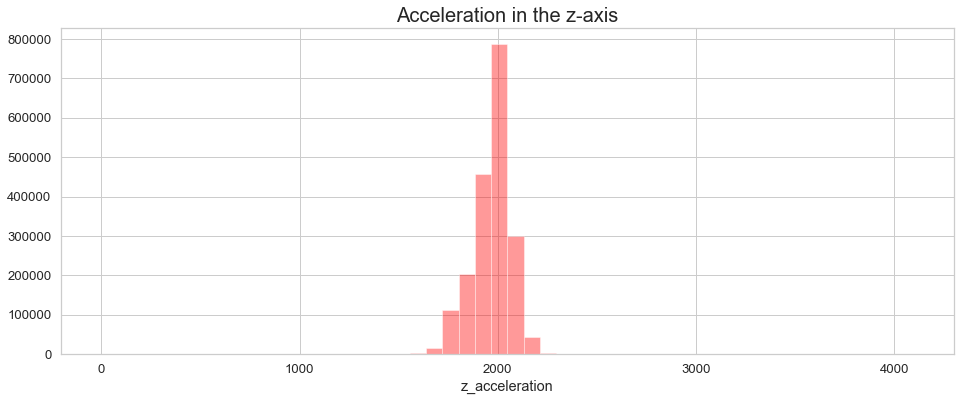

In [29]:
print("z-accelaration")


plt.figure(figsize=[16,6])
sns.set_style('whitegrid') 
sns.distplot(df['z_acceleration'],kde=False, color ='red') 
plt.title('Acceleration in the z-axis',fontsize=20)
plt.show()

Conclusion: Most of the x_accelearation lies between 1500 and 2200. The maximum value of z_acceleration is aprroximately equal to 800000.

Distribution of the labels for specific tasks


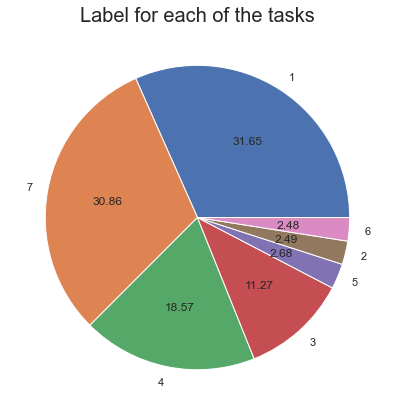

In [32]:
print("Distribution of the labels for specific tasks")

plt.figure(figsize=[7,7])
Values_Label= df['Label'].value_counts()
plt.pie(Values_Label.values, labels=Values_Label.keys(), autopct='%0.2f')
plt.title('Label for each of the tasks',fontsize=20)
plt.show()

Conclusions:
1. Label 7 and Label 1 constituents for 62% of the tasks
2. Label 2,3,4,5,6 constituents for the remaining 38% with Label 4 constituting for 18.57%. Remaining labels add up to 20%
3. Interestingly, Label 2,5 and 6 are the least performed tasks

User-IDs with maximum data


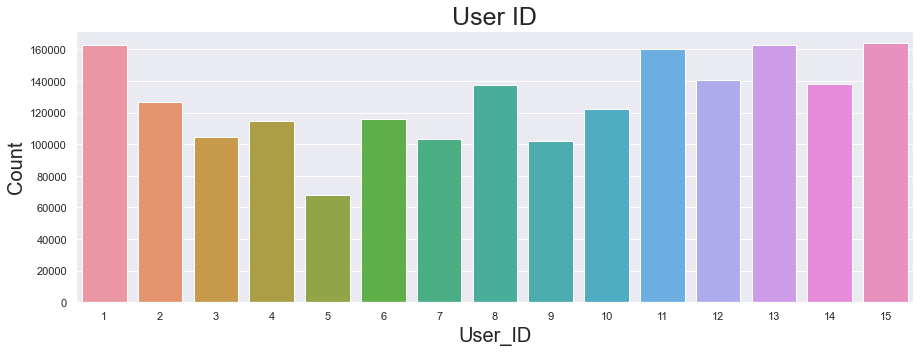

In [33]:
print("User-IDs with maximum data")

plt.figure(figsize=[15,5])
sns.set(style="darkgrid")
plt.title('User ID',fontsize=25)
ax = sns.countplot(x="User_ID", data=df)
plt.xlabel("User_ID", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.show()

1. Maximum amount of data is from user-Ids 1,11-15
2. User ID 5 has the least data available

### Hypothesis 1: Time spent by each individual on task 1 (Working on Computer) is the maximum. As the Task 1 is being seen 608667 times in the data, and it is the highest.

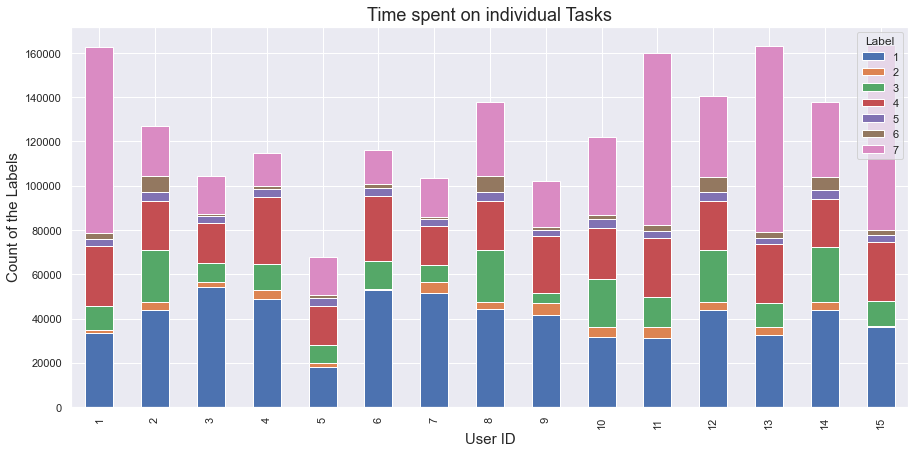

In [34]:
df.groupby(['User_ID','Label']).size().unstack().plot(kind='bar',stacked=True, figsize=[15,7])
plt.title('Time spent on individual Tasks',fontsize=18)
plt.xlabel('User ID',fontsize=15)
plt.ylabel('Count of the Labels',fontsize=15)
plt.show()

### Conclusion: Users 2,3,5,14 have spent more time on Task 7 than on Task 1, the stated Hypothesis 1 is false.

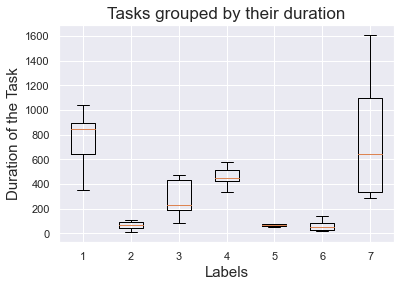

In [35]:
new_data=[]
for k,values in df.groupby('User_ID'):
    new_data.append(values.iloc[:,:4].values)

def activity_group(new_data,Labels):
    activity_groups=[{label:new[new[:,-1]==label] for label in Labels} for new in new_data]
    return activity_groups

def duration(activity_groups,Labels):
    frequency=52
    time_range = [[len(new[act])/frequency for new in activity_groups] for act in Labels]
    return time_range

def durations_plot(activity_groups,Labels):
    time_range = duration(activity_groups,Labels)
    plt.boxplot(time_range, labels=Labels)
    plt.title("Tasks grouped by their duration",fontsize=17 )
    plt.xlabel("Labels",fontsize=15)
    plt.ylabel("Duration of the Task",fontsize=15)
    plt.show()
    
Labels=[label for label in range(1,8)]
activity_groups=activity_group(new_data,Labels)
durations_plot(activity_groups,Labels)

## After grouping the activities for the individuals it can be seen that Task 5 is the least performed while Task 7 is most performed

## Data Modeling

### Decision Tree

In [38]:
X = df[['x_acceleration', 'y_acceleration', 'z_acceleration','User_ID']]
y = df['Label']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

decision_tree_model = DecisionTreeClassifier(random_state=0)
clf = decision_tree_model.fit(X_train, y_train)
decision_pred = decision_tree_model.predict(X_test)

print("Accuracy score using Decision tree is",accuracy_score(y_test, decision_pred))

Accuracy score using Decision tree is 0.7340377222447544


In [40]:
data_col = []
current_Mscore = 0.0
Num_columns = 4
shuf_columns = shuffle(range(0,Num_columns), random_state=1)
ls=['x_acceleration', 'y_acceleration', 'z_acceleration','User_ID']


for cols in range(0, Num_columns): 
    data_col.append(ls[shuf_columns[cols]])
    print(data_col)
    
    newData = data[data_col]
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(newData, df['Label'], test_size=0.30, random_state=0)
    dtree_classifier = DecisionTreeClassifier()

    fit = dtree_classifier.fit(X_Train, Y_Train)
    new_Score = dtree_classifier.score(X_Test, Y_Test)
    
    if new_Score < current_Mscore:
        data_col.remove(shuf_columns[cols])
    else:
        current_Mscore = new_Score
        print("Score with " + str(len(data_col)) + " selected features: " + str(new_Score))

print("There are " + str(len(data_col)) + " features selected:", data_col)

['User_ID']
Score with 1 selected features: 0.42017041219923945
['User_ID', 'z_acceleration']
Score with 2 selected features: 0.6435192407020317
['User_ID', 'z_acceleration', 'x_acceleration']
Score with 3 selected features: 0.6915092017734517
['User_ID', 'z_acceleration', 'x_acceleration', 'y_acceleration']
Score with 4 selected features: 0.7338210671907985
There are 4 features selected: ['User_ID', 'z_acceleration', 'x_acceleration', 'y_acceleration']


## In numerical analysis, hill climbing is a mathematical optimization technique which belongs to the family of local search. It is an iterative algorithm that starts with an arbitrary solution to a problem, then attempts to find a better solution by making an incremental change to the solution.

### Hence with the above method we can see there are 4 selected features as we have maximum score of 0.7338

In [41]:
# Plot of Accuracy
test_accuracy = decision_tree_model.score(X_test, y_test)
train_accuracy = decision_tree_model.score(X_train, y_train)

decision_score=[test_accuracy,train_accuracy]

In [42]:
cv = confusion_matrix(y_test, decision_pred)
print("Confusion matrix\n",cv)

Confusion matrix
 [[169493   3528   2266   4033    620    210   2620]
 [  5223   4587    963   2116    243    122   1166]
 [  2128   1081  32506  11524   2997   1786  12861]
 [  4001   2217  13146  69494   4858   2749  10675]
 [   642    261   3720   4179   3581    624   2342]
 [   204    111   2304   2412    785   3646   4900]
 [  2741   1351  14880  10802   2795   5262 140199]]


In [43]:
decision_cr = classification_report(y_test,decision_pred)
print("Classification report\n",decision_cr)

Classification report
               precision    recall  f1-score   support

           1       0.92      0.93      0.92    182770
           2       0.35      0.32      0.33     14420
           3       0.47      0.50      0.48     64883
           4       0.66      0.65      0.66    107140
           5       0.23      0.23      0.23     15349
           6       0.25      0.25      0.25     14362
           7       0.80      0.79      0.79    178030

    accuracy                           0.73    576954
   macro avg       0.53      0.52      0.52    576954
weighted avg       0.74      0.73      0.73    576954



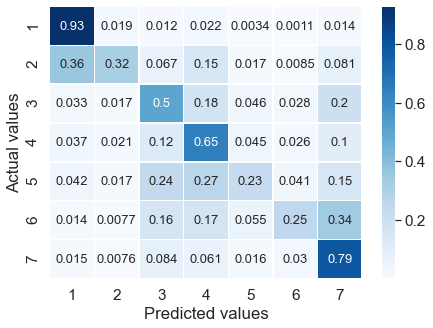

In [44]:
target_names=[1,2,3,4,5,6,7]
#The values are normalised in order to plot the confusion matrix
decision_tree_cm = cv.astype('float') / cv.sum(axis=1)[:, np.newaxis]

#Confusion matrix is plotted for the normalised values obtained with the Labels
dtree_cm = pd.DataFrame(decision_tree_cm, columns=np.unique(target_names), index = np.unique(target_names))
dtree_cm.index.name = 'Actual values'
dtree_cm.columns.name = 'Predicted values'

plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(dtree_cm, cmap="Blues",linewidth=0.5, annot=True,annot_kws={"size":13})
plt.show()

### K - Nearest Neighbours Classifier

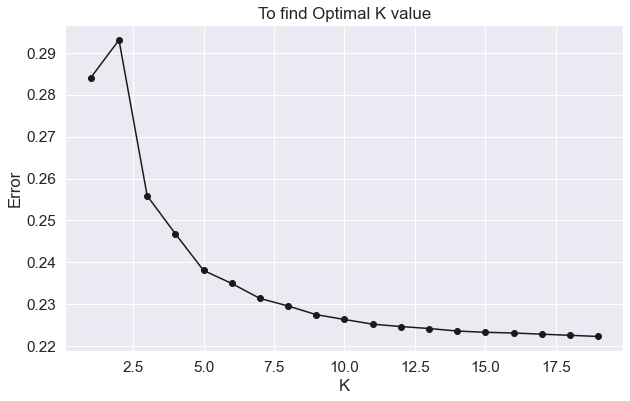

In [45]:
non_optimal=[]

for optimal_k in range(1,20):
    KNN = KNeighborsClassifier(n_neighbors=optimal_k)
    KNN.fit(X_train,y_train)
    pred_optimal_k = KNN.predict(X_test)
    non_optimal.append(np.mean(pred_optimal_k != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,20), non_optimal, '-ok')
plt.title('To find Optimal K value')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [46]:
# CHoosing 8 as the error is constant after k=8


KNN_classifier = KNeighborsClassifier(8, weights='distance')
KNN_classifier.fit(X_train, y_train)
y_pred = KNN_classifier.predict(X_test)

print("Accuracy score using KNN Classifier is: {}".format(accuracy_score(y_test, y_pred)))

Accuracy score using KNN Classifier is: 0.7639985163461905


In [48]:
KNN_classifier_param = KNeighborsClassifier(8, weights='distance', p=1)
KNN_classifier_param.fit(X_train, y_train)
y_pred = KNN_classifier_param.predict(X_test)

print("Accuracy score using KNN Classifier is: {}".format(accuracy_score(y_test, y_pred)))

Accuracy score using KNN Classifier is: 0.7672171438277575


In [49]:
test_accuracy = KNN_classifier_param.score(X_test, y_test)
train_accuracy = KNN_classifier_param.score(X_train, y_train)

KNN_score=[test_accuracy,train_accuracy]

In [50]:
k_confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix is\n",k_confusion_matrix)

Confusion matrix is
 [[171446   1986   1346   4623    235     90   3044]
 [  5432   3632    812   2888    100     35   1521]
 [  2281    455  32336  13236   1828   1098  13649]
 [  5644    731   7907  79121   1242    669  11826]
 [   999     66   3242   5724   2352    358   2608]
 [   262     46   2014   2727    537   3383   5393]
 [  2787    535  10095  10257   1110   2867 150379]]


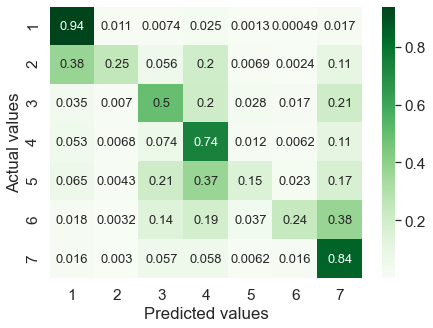

In [51]:
target_names=[1,2,3,4,5,6,7]
#The values are normalised in order to plot the confusion matrix
conf_matrix = k_confusion_matrix.astype('float') / k_confusion_matrix.sum(axis=1)[:, np.newaxis]

#Confusion matrix is plotted for the normalised values obtained with the Labels
df_cm_k = pd.DataFrame(conf_matrix, columns=np.unique(target_names), index = np.unique(target_names))
df_cm_k.index.name = 'Actual values'
df_cm_k.columns.name = 'Predicted values'

plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm_k, cmap="Greens", annot=True,annot_kws={"size": 13})
plt.show()

In [52]:
knn_cr=classification_report(y_test, y_pred)
print("Classification report\n",knn_cr)

Classification report
               precision    recall  f1-score   support

           1       0.91      0.94      0.92    182770
           2       0.49      0.25      0.33     14420
           3       0.56      0.50      0.53     64883
           4       0.67      0.74      0.70    107140
           5       0.32      0.15      0.21     15349
           6       0.40      0.24      0.30     14362
           7       0.80      0.84      0.82    178030

    accuracy                           0.77    576954
   macro avg       0.59      0.52      0.54    576954
weighted avg       0.75      0.77      0.76    576954



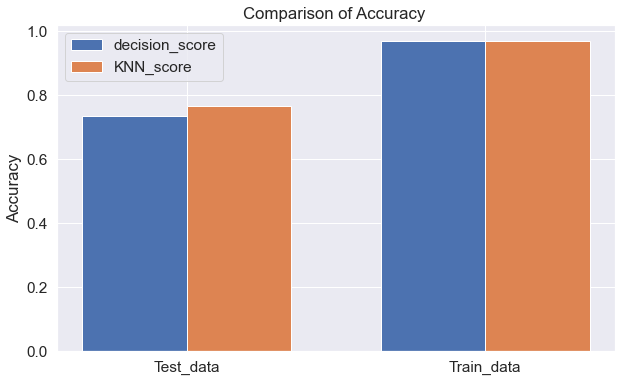

In [53]:
ind = np.arange(2) 
width = 0.35
plt.figure(figsize=(10,6))
plt.bar(ind, decision_score, width, label='decision_score')
plt.bar(ind + width, KNN_score, width, label='KNN_score')

plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy ')

plt.xticks(ind + width / 2, ('Test_data', 'Train_data'))
plt.legend(loc='best')
plt.show()

### Accuracy of Decision tree is 73.15% and KNN Classifier is 76.45% on the Test data, and the accuracy is same ###for the train data.
### Accuracy from the KNN Classifier is slightly higher than that of Decision tree.
### The computational complexity for KNN is comparatively more for the Decision tree on the dataset.
### The precision score for Decision tree is 0.52 and KNN classifier is 0.59

# Hence, we select the KNN classifier as the model.